### 주요 라이브러리 import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### 시각화 설정

In [11]:
%matplotlib qt5
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13
plt.ion()

### 간단한 복소수 함수 살펴보기
+ z를 입력받아 제곱을 구한 뒤 1을 뺄샘하는 Python 함수 f(z)를 구현하세요.

In [18]:
def f(z):
    output = np.power(z, 2) - 1
    return output
f(0)

-1

### 배열을 받아 반환

In [34]:
z = [4, 1-0.2j, 1.6]
f(z)

array([15.  +0.j , -0.04-0.4j,  1.56+0.j ])

### 더 많은 복소수 집합에 대한 함수의 동작 확인
+ 복소수 집합을 생성하고 이를 실수축과 허수축으로 구성되는 복소 평면에 시각화 할 수 있다.
+ 데이터를 선형 간격으로 생성하는 lispace() 유니버설 함수를 이용하여 X축과 Y축에 해당되는 값 집합을 각각 생성하는 코드를 작성하시오.

In [33]:
#두 집합 모두 -10에서 10 사이에서 균일한 간격을 가지는 20개의 값으로 구성되며, 생성된 집합에 meshgrid()함수를 적용하면 집합 간에 Cartesian Product가 수행되어 2차원 점 집합이 생성됩니다.
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))

#복소수 집합(mesh)로 변환하기
mesh = np.array(x + 1j * y)

#mesh의 입력을 받아 f(z) 함수 계산 결과를의 절대값 구하기
out_put = np.abs(f(mesh))


### 3차원 산점도로 시각화

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')      # 실수부
ax.set_ylabel('Imaginary axis') # 허수부
ax.set_zlabel('Absolute value') # 함수값의 절대값
ax.set_title('One Iteration: $f(z) = z^2 - 1$')

Text(0.5, 0.92, 'One Iteration: $f(z) = z^2 - 1$')

In [40]:
output = np.abs(f(f(mesh))) # 함수 두 번 반복

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$')

Text(0.5, 0.92, 'Two Iterations: $ f(z) = z^2 - 1$')

### 유사한 복소수 집합에 대해 함수 반복 적용하기
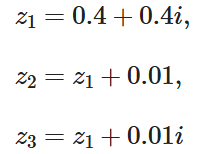
+ 각 값에 대해 함수를 10회 적용하기

In [42]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros(
    (num_iter+1, selected_values.shape[0]),  # 10X3 Zero 배열 생성
    dtype=complex  # 데이터 타입: 복소수
)
outputs[0] = selected_values   # 함수 초기 조건

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])  # 10번 함수 반복하는 동안 각 결과를 저장

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(
        data.real,  # 실수부
        data.imag,  # 허수부
        c=range(data.shape[0]), 
        alpha=0.6
    )
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location='bottom', label='Iteration');

### 발산 전까지 함수 반복 적용 및 시각화
+ divergence_rate는 mesh의 각 복소수 값에 대해 함수 수행을 반복하고 값이 발산하기 전에 반복 횟수를 집계하는 코드입니다.

+ 마스킹 연산을 이용하여 복소수 집합(z)내의 개별 복소수의 절대값이 반경(radius)보다 작을 경우, True 값을 가지는 Boolean 배열 마스크(conv_mask)을 생성
참고: 절대값이 반경보다 작은 값들은 아직 발산되지 않은 값들이다.
+ 생성된 마스크(conv_mask)에서 True 에 해당되는 diverge_len 배열의 값들을 선택해서 이들의 반복 횟수(diverge_len)를 1 증가.
+ 마스크에서 True 에 해당되는 복소수 집합(z) 내의 값들을 선택하여 함수를 한 번 더 적용하고 그 결과를 z에 다시 저장


In [45]:
def divergence_rate(mesh, num_iter=10, radius=2):

    z = mesh.copy()
    # 값 별 반복 횟수를 저장
    diverge_len = np.zeros(mesh.shape)

    # 발산되지 않은 값들에 대해 함수를 반복 적용
    for i in range(num_iter):
        # [+] 1. Boolean 배열  마스크 생성
        conv_mask = np.array(np.abs(z) < radius, dtype=bool)

        # [+] 2. 해당 값들에 대한 diverge_len 값 증가
        diverge_len[conv_mask] += 1

        # [+] 3. 해당 값들에 대해 함수 적용
        z[conv_mask] = f(z[conv_mask])

    return diverge_len

+ 위에서 함수를 정의했으니, 마지막으로 초기에 주어지는 복소수 집합 mesh를 다시 생성해야합니다. linspace()를 이용하여,[-2,2]범위의 균일한 400개의 값으로 이루어진 배열을 두 개 생성하세요.

+ 나머지 코드는 두 배열로부터 mesh를 생성하고, 이를 인자로 해서 divergence_rate함수를 호출하고 반환받은 diverge_len을 2D 이미지로 시각화하는 부분입니다

In [46]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2-1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');
